In [3]:
# Required modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [6]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]
combined_score = Pat + Jack + Alex
print("Combined score is:", combined_score)

Combined score is: [5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]


In [7]:
archer_names = ((['Pat'] * len(Pat)) + (['Jack'] * len(Jack)) +
                (['Alex'] * len(Alex)))
my_data = pd.DataFrame({'archer_names': archer_names, 'score': combined_score})
display(my_data)

,archer_names,score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [8]:

display(my_data.groupby('archer_names').mean())

,score
archer_names,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [9]:
linear_model = ols("score ~ archer_names", data=my_data).fit()
my_table = sm.stats.anova_lm(linear_model)
print(my_table)

                df     sum_sq    mean_sq         F    PR(>F)
archer_names   2.0  46.777778  23.388889  4.488273  0.029668
Residual      15.0  78.166667   5.211111       NaN       NaN


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


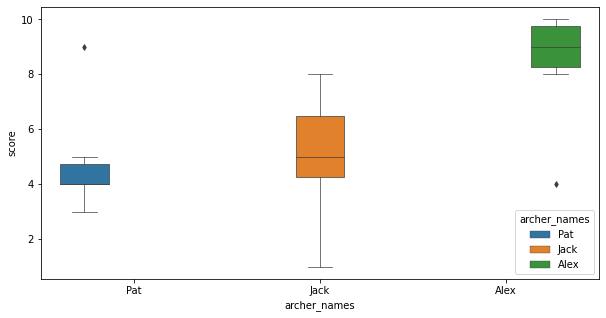

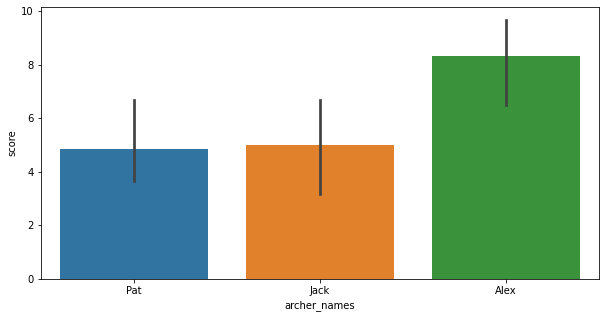

In [10]:
plt.figure(figsize=(10, 5))
print(
    sns.boxplot(x='archer_names',
                y='score',
                data=my_data,
                hue='archer_names',
                linewidth=0.7,
                fliersize=4))
plt.figure(figsize=(10, 5))
print(sns.barplot(x='archer_names', y='score', data=my_data))

In [11]:
multi_comparision = MultiComparison(my_data['score'], my_data['archer_names'])
multi_comparision_results = multi_comparision.tukeyhsd(alpha=0.05)
display(multi_comparision_results.summary())

group1,group2,meandiff,p-adj,lower,upper,reject
Alex,Jack,-3.3333,0.0568,-6.7554,0.0887,False
Alex,Pat,-3.5,0.0447,-6.922,-0.078,True
Jack,Pat,-0.1667,0.9,-3.5887,3.2554,False
